In [2]:
import cv2 as cv 
import numpy as np 
from scipy.spatial import distance
import matplotlib.pyplot as plt
cap = cv.VideoCapture("vedio1.mp4")  
ret, first_frame = cap.read()  
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY) 
mask = np.zeros_like(first_frame) 
mask[..., 1] = 255
density = np.array([])
destance=np.array([])
nu=1;

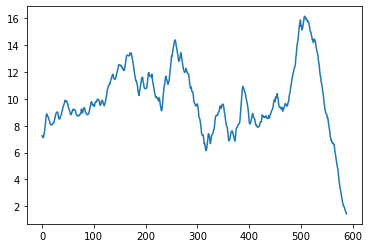

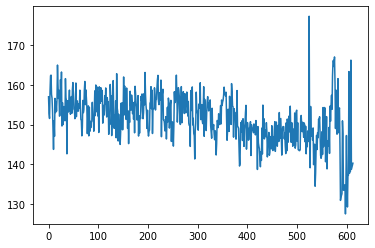

In [3]:

while(ret): 

    ret, frame = cap.read() 
    if(ret == 0):  break    
    cv.imshow("input", frame)  
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) 
    # Calculates dense optical flow by Farneback method 
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                        None, 
                                        0.5, 3, 15, 3, 5, 1.2, 0) 
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1]) 

    # Sets image hue according to the optical flow 
    # direction 
    mask[..., 0] = angle * 180 / np.pi / 2
    # Sets image value according to the optical flow 
    # magnitude (normalized) 
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX) 
        # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)  
    rgb1 = cv.cvtColor(rgb, cv.COLOR_BGR2GRAY)
    ret1,bina = cv.threshold(rgb1,30,255,cv.THRESH_BINARY)
    # Opens a new window and displays the output frame 
    cv.imshow("dense optical flow", bina) 
    contours, hierarchy = cv.findContours(bina,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    x,y=bina.shape
    n1=np.array(bina)
    density = np.append(density,(np.count_nonzero(n1==255)/(x*y))*100)
    c1,c2=(x-1)/2,(y-1)/2
    dis=0
    nb=len(contours)
    for c in contours:
    # calculate moments for each contour
        M = cv.moments(c)
        area = cv.contourArea(c)
        # calculate x,y coordinate of center
        if M["m00"] != 0 and area >=4:
            X = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            d = distance.euclidean((c1,c2), (cX,cY))            
        else:
            cX, cY = 0, 0
            nb=nb-1            
            d=0
        dis=dis+d
    dis=dis/nb
    destance=np.append(destance,dis) 
    nu=nu+1
# Updates previous frame 
    prev_gray = gray 

# Frames are read by intervals of 1 millisecond. The 
# programs breaks out of the while loop when the 
# user presses the 'q' key 
    if cv.waitKey(1) & 0xFF == ord('q'): 
        break
density_cumsum=np.cumsum(density)
destance_cumsum=np.cumsum(destance)
a1=np.array([])
a2=np.array([])
a1=np.append(a1,density_cumsum[24]/25)
a2=np.append(a2,destance_cumsum[24]/25)
for i in range(25,len(density_cumsum)):
	a1=np.append(a1,(density_cumsum[i]-density_cumsum[i-25])/25)
	a2=np.append(a2,(destance_cumsum[i]-destance_cumsum[i-25])/25)
plt.plot(a1)
# print(nu)
plt.savefig('11.png', bbox_inches='tight')
plt.show()
plt.plot(destance)
plt.savefig('12.png', bbox_inches='tight')
plt.show()
# The following frees up resources and 
# closes all windows 
cap.release() 
cv.destroyAllWindows() 
